In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#libraries to use
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [ ]:
#the goal here to determine which model will give us the most accurate results
#we will choose between Lasso and Ridge because we want to see which model
#works better given the uses for each and the model we have curently in place 

path = '/content/drive/Shareddrives/MATH456/' 

data = pd.read_csv(path + 'Cleaned.csv')

#As we have mentioned before, this is the variables which went to produce the 
#highest VIF due to the high correlation with other variables in dataset

#Including NASDAQX will increase the accuracy of the model even further,
#however it remains quite accurate without this data and 

#data = data.drop(['quarter','NASDAQX','Consumer Price Index for All Urban Wage Earners and Clerical Workers: ' + 
#                  'Information Technology, Hardware and Services in U.S. City Average',
#                  'Large Bank Consumer Credit Card Balances: Total Balances'], 
#                 axis=1)

data = data.drop(['quarter','Consumer Price Index for All Urban Wage Earners and Clerical Workers: ' + 
                  'Information Technology, Hardware and Services in U.S. City Average',
                  'Large Bank Consumer Credit Card Balances: Total Balances'], 
                 axis=1)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], 
                                                      data.iloc[:,0], 
                                                      test_size=.3)


#Create the two models
lasso_reg = Lasso(tol=.01).fit(X_train, y_train)
clf = Ridge().fit(X_train, y_train)

#Make lists of each models' NASDAQ predictions
# so that we can find the error in the models.
lasso_predictions = lasso_reg.predict(X_test)
clf_predictions = clf.predict(X_test)
true_values = y_test.tolist()

for i in range(len(true_values)):
  print("-----------------------------------")
  print(f"      True value: {true_values[i]}")
  print(f"Lasso Prediction: {lasso_predictions[i]}")
  print(f"Ridge Prediction: {clf_predictions[i]}")
  print("Error: ")
  print(f"Lasso Error: {np.abs(true_values[i]-lasso_predictions[i])}")
  print(f"Ridge Error: {np.abs(true_values[i]-clf_predictions[i])}")
  print()
  print(i)


-----------------------------------
      True value: 4210.4
Lasso Prediction: 3783.758286415534
Ridge Prediction: 3903.9190837851884
Error: 
Lasso Error: 426.64171358446583
Ridge Error: 306.48091621481126

0
-----------------------------------
      True value: 4614.2
Lasso Prediction: 4496.316712625163
Ridge Prediction: 4559.003694501491
Error: 
Lasso Error: 117.88328737483698
Ridge Error: 55.19630549850899

1
-----------------------------------
      True value: 14000.62
Lasso Prediction: 14612.495111380349
Ridge Prediction: 14624.10916275575
Error: 
Lasso Error: 611.8751113803482
Ridge Error: 623.4891627557499

2
-----------------------------------
      True value: 4998.14
Lasso Prediction: 5076.599031071239
Ridge Prediction: 4650.851210187938
Error: 
Lasso Error: 78.45903107123831
Ridge Error: 347.28878981206253

3
-----------------------------------
      True value: 7253.85
Lasso Prediction: 6606.190435461554
Ridge Prediction: 6977.294722292547
Error: 
Lasso Error: 647.65956453

In [ ]:
#Assessment of the Lasso and Ridge models over N possible train/test data
#splits. The .score() function returns the R^2 coeffecient, which helps to
#measure the accuracy of the respective model. The best possible score is 1.0,
#and ideally we would produce a model with a score of .7 or better.

lasso_scores = []
lasso_error = []
lasso_rawerror = []
lasso_RMSE = []
lasso_ave_pos_error = []
lasso_ave_neg_error = []

ridge_scores = []
ridge_error = []
ridge_rawerror = []
ridge_RMSE = []
ridge_ave_pos_error = []
ridge_ave_neg_error = []

for i in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], 
                                                      data.iloc[:,0], 
                                                      test_size=.3)


  #Create the two models
  lasso_reg = Lasso(tol=.01).fit(X_train, y_train)
  clf = Ridge().fit(X_train, y_train)

  #Find the R^2 score of the two models
  lasso_scores.append(lasso_reg.score(X_test, y_test))
  ridge_scores.append(clf.score(X_test, y_test))

  #Make lists of each models' NASDAQ predictions
  # so that we can find the error in the models.
  lasso_predictions = lasso_reg.predict(X_test)
  clf_predictions = clf.predict(X_test)
  true_values = y_test.tolist()

  temp_lasso = []
  temp_lasso_pos = []
  temp_lasso_neg = []

  temp_ridge = []
  temp_ridge_pos = []
  temp_ridge_neg = []

  #Loops through the true values and calculates
  # various errors.
  for j in range(len(true_values)):
    lasso_e = lasso_predictions[j]-true_values[j]
    ridge_e = clf_predictions[j]-true_values[j]
    lasso_error.append(lasso_e)
    temp_lasso.append(lasso_e)
    ridge_error.append(ridge_e)
    temp_ridge.append(ridge_e)
    if lasso_e >= 0:
      temp_lasso_pos.append(lasso_e)
    else:
      temp_lasso_neg.append(lasso_e)
    if ridge_e >= 0:
      temp_ridge_pos.append(ridge_e)
    else:
      temp_ridge_neg.append(ridge_e)


  lasso_RMSE.append(np.sqrt((sum(temp_lasso)**2)/len(temp_lasso)))
  lasso_rawerror.append(sum(temp_lasso)/len(temp_lasso))

  ridge_RMSE.append(np.sqrt((sum(temp_ridge)**2)/len(temp_ridge)))
  ridge_rawerror.append(sum(temp_ridge)/len(temp_ridge))

  try:
    lasso_ave_pos_error.append(sum(temp_lasso_pos)/len(temp_lasso_pos))
    lasso_ave_neg_error.append(sum(temp_lasso_neg)/len(temp_lasso_neg))
    ridge_ave_pos_error.append(sum(temp_ridge_pos)/len(temp_ridge_pos))
    ridge_ave_neg_error.append(sum(temp_ridge_neg)/len(temp_ridge_neg))
  except ZeroDivisionError:
    pass

  

mean_lasso_score = sum(lasso_scores)/len(lasso_scores)
mean_ridge_score = sum(ridge_scores)/len(ridge_scores)

mean_lasso_RMSE = sum(lasso_RMSE)/len(lasso_RMSE)
mean_ridge_RMSE = sum(ridge_RMSE)/len(lasso_RMSE)


print('Average Lasso Score: ', mean_lasso_score)
print('Average Lasso RMSE: ', mean_lasso_RMSE)
print()
print('Average Ridge Score: ', mean_ridge_score)
print('Average Ridge RMSE: ', mean_ridge_RMSE)


Average Lasso Score:  0.8171656225173874
Average Lasso RMSE:  1025.8171967583542

Average Ridge Score:  0.9707481843113219
Average Ridge RMSE:  514.8630646874866


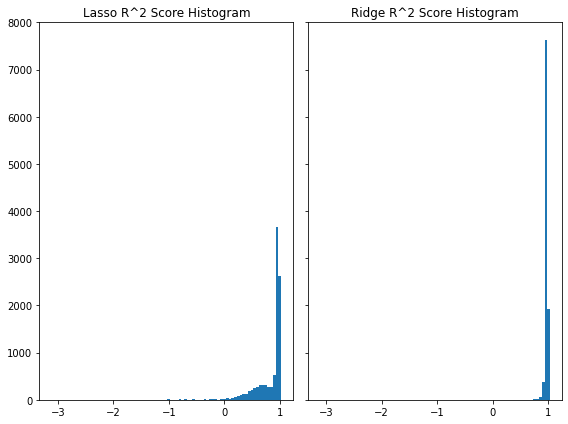

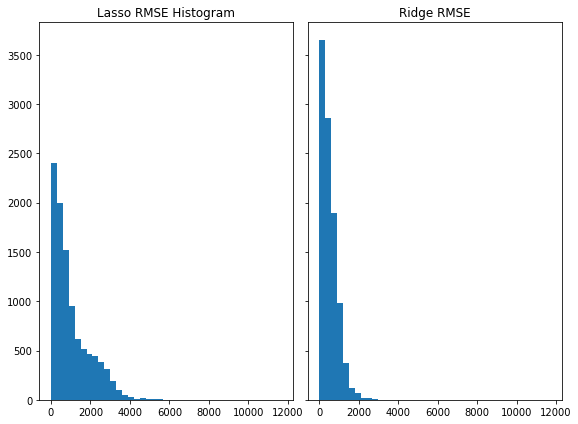

In [ ]:
binwidth = .05
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6), sharey = True, sharex = True) 
ax1.hist(lasso_scores, bins=np.arange(min(lasso_scores), max(lasso_scores) + binwidth, binwidth))
ax1.set_title('Lasso R^2 Score Histogram')
ax2.hist(ridge_scores, bins=np.arange(min(ridge_scores), max(ridge_scores) + binwidth, binwidth))
ax2.set_title('Ridge R^2 Score Histogram')
plt.tight_layout()

binwidth = 300
f, (ax3, ax4) = plt.subplots(1, 2, figsize=(8,6), sharey = True, sharex = True) 
ax3.hist(lasso_RMSE, bins=np.arange(min(lasso_RMSE), max(lasso_RMSE) + binwidth, binwidth))
ax3.set_title('Lasso RMSE Histogram')
ax4.hist(ridge_RMSE, bins=np.arange(min(ridge_RMSE), max(ridge_RMSE) + binwidth, binwidth))
ax4.set_title('Ridge RMSE')
plt.tight_layout()

Lasso Average Error Standard Deviation:  365.15365420014484
              Lasso Average Error Mean:  171.29627442191565

Ridge Average Error Standard Deviation:  187.38974728449602
              Ridge Average Error Mean:  -24.295095779481272


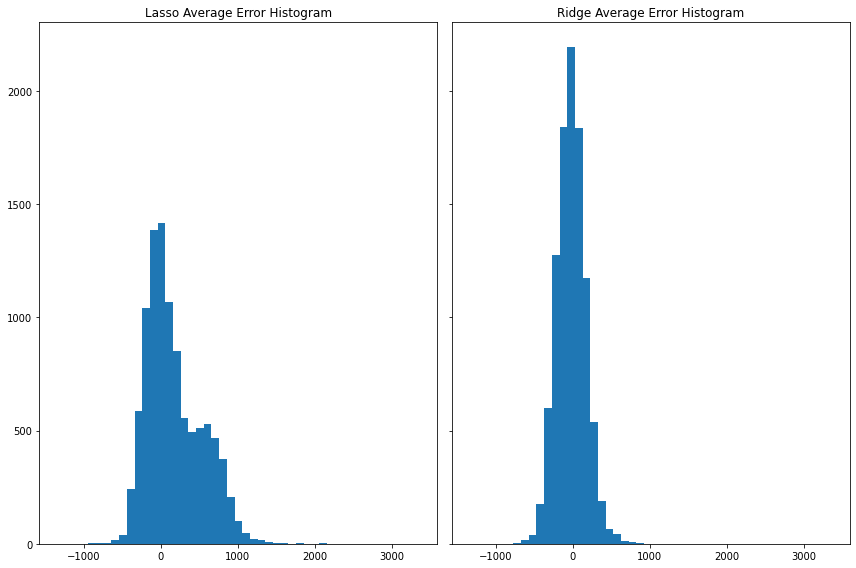

In [ ]:
binwidth = 100
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharex = True, sharey = True) 
ax1.hist(lasso_rawerror, bins=np.arange(min(lasso_rawerror), max(lasso_rawerror) + binwidth, binwidth))
ax1.set_title('Lasso Average Error Histogram')
ax2.hist(ridge_rawerror, bins=np.arange(min(ridge_rawerror), max(ridge_rawerror) + binwidth, binwidth))
ax2.set_title('Ridge Average Error Histogram')
plt.tight_layout()

print('Lasso Average Error Standard Deviation: ', np.std(lasso_rawerror))
print('              Lasso Average Error Mean: ', np.mean(lasso_rawerror))
print()
print('Ridge Average Error Standard Deviation: ', np.std(ridge_rawerror))
print('              Ridge Average Error Mean: ', np.mean(ridge_rawerror))

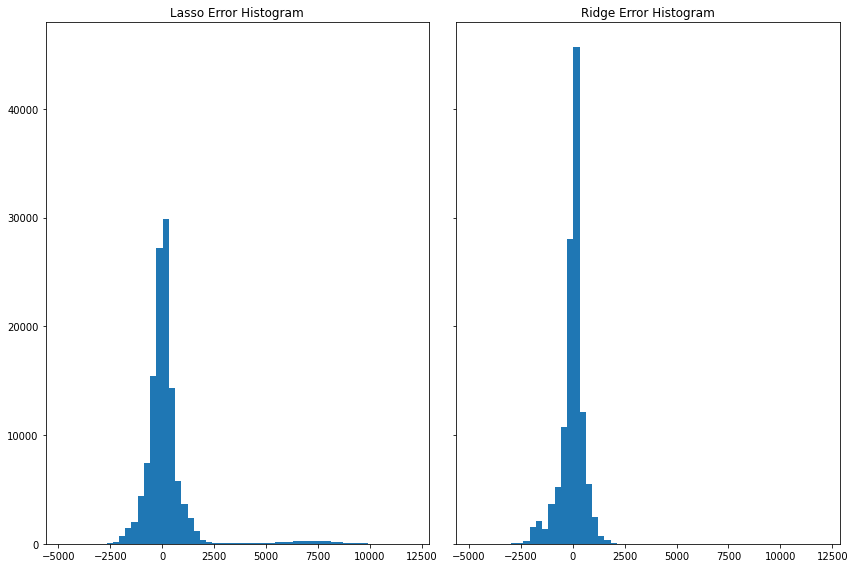

In [ ]:
binwidth = 300
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharey = True, sharex = True) 
ax1.hist(lasso_error, bins=np.arange(min(lasso_error), max(lasso_error) + binwidth, binwidth))
ax1.set_title('Lasso Error Histogram')
ax2.hist(ridge_error, bins=np.arange(min(lasso_error), max(lasso_error) + binwidth, binwidth))
ax2.set_title('Ridge Error Histogram')
plt.tight_layout()

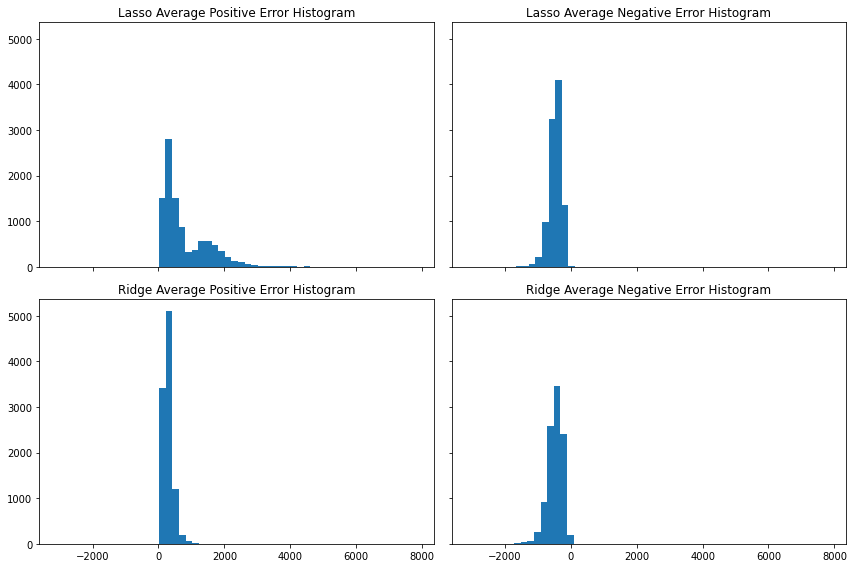

In [ ]:
binwidth = 200
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,8), sharey = True, sharex=True) 
ax1.hist(lasso_ave_pos_error, bins=np.arange(min(lasso_ave_pos_error), max(lasso_ave_pos_error) + binwidth, binwidth))
ax1.set_title('Lasso Average Positive Error Histogram')
ax2.hist(lasso_ave_neg_error, bins=np.arange(min(lasso_ave_neg_error), max(lasso_ave_neg_error) + binwidth, binwidth))
ax2.set_title('Lasso Average Negative Error Histogram')
ax3.hist(ridge_ave_pos_error, bins=np.arange(min(ridge_ave_pos_error), max(ridge_ave_pos_error) + binwidth, binwidth))
ax3.set_title('Ridge Average Positive Error Histogram')
ax4.hist(ridge_ave_neg_error, bins=np.arange(min(ridge_ave_neg_error), max(ridge_ave_neg_error) + binwidth, binwidth))
ax4.set_title('Ridge Average Negative Error Histogram')
plt.tight_layout()

Roughly 35.13513513513514 percent of the quarters had a change of over 200 points


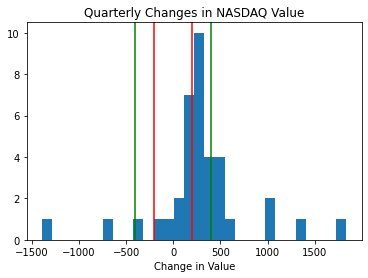

In [ ]:
my_y = data.iloc[:,0].tolist()
quarterly_change = []

for i in range(len(my_y)-1):
  quarterly_change.append(my_y[i+1] - my_y[i])

greater_than_200 = 0

for i in quarterly_change:
  if np.abs(i) >= 400:
    greater_than_200 += 1

print('Roughly', greater_than_200/len(quarterly_change) * 100, 'percent of the quarters had a change of over 200 points')

plt.figure(0)
plt.hist(quarterly_change, bins = 30)
plt.title("Quarterly Changes in NASDAQ Value")
plt.xlabel("Change in Value")
plt.axvline(x = 200, color = 'r', label = 'axvline - full height')
plt.axvline(x = -200, color = 'r', label = 'axvline - full height')
plt.axvline(x = 400, color = 'g', label = 'axvline - full height')
plt.axvline(x = -400, color = 'g', label = 'axvline - full height')
plt.show()


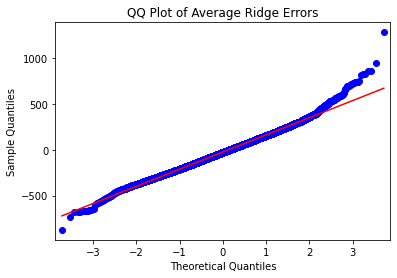

In [ ]:
#The QQ plot shows that the errors in the ridge regression are very nearly normally distributed
qqplot(np.array(ridge_rawerror), line='s')
plt.title('QQ Plot of Average Ridge Errors')
plt.show()